In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, SelectPercentile

In [5]:
import os 

base_dir = '/Volumes/KESU/House_Prices'
data_dir = os.path.join(base_dir, 'dataset')
dataset = pd.read_csv(os.path.join(data_dir, 'train.csv'))
dataset.shape

(1460, 81)

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_var = list(dataset.select_dtypes(include=numerics).columns)
dataset = dataset[numerical_var]
dataset.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(labels=['Id','SalePrice'], axis=1), dataset['SalePrice'], 
                                                                                        test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((1022, 36), (438, 36))

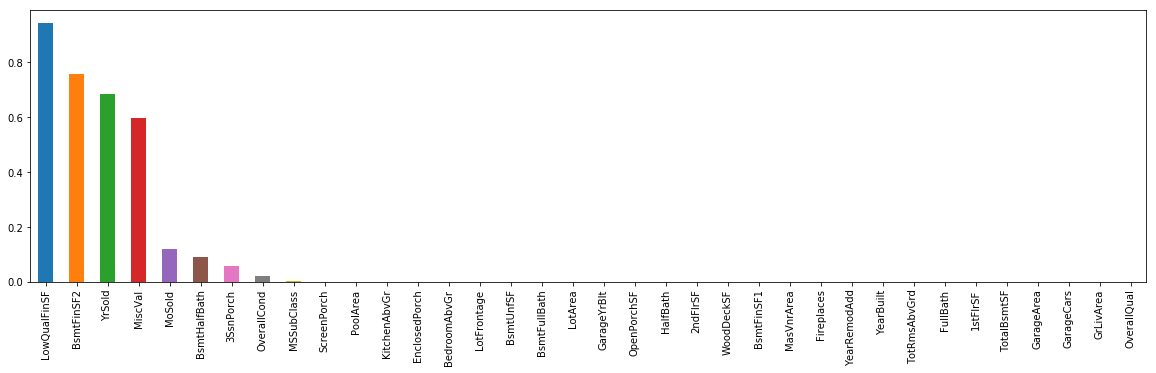

In [12]:
univariate = f_regression(X_train.fillna(0), y_train)
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,5))

In [14]:
sel_ = SelectPercentile(f_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')